<a href="https://colab.research.google.com/github/CristiSavca/DataScience-MicroCredential/blob/main/Lab_1_LR%26KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CristiSavca/ML_Data/main/iris.csv')

# EDA

In [3]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# will need to be scaled later due to contrast between min and max values

In [8]:
df.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

# Data Visualization

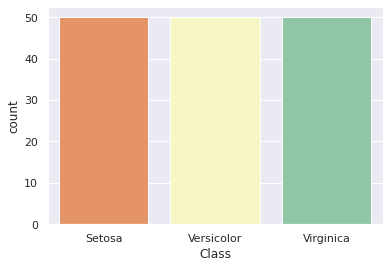

In [9]:
sns.countplot(x ='Class', data = df, palette='Spectral')

In [10]:
# This countplot shows that there are 50 plants of each type / Class

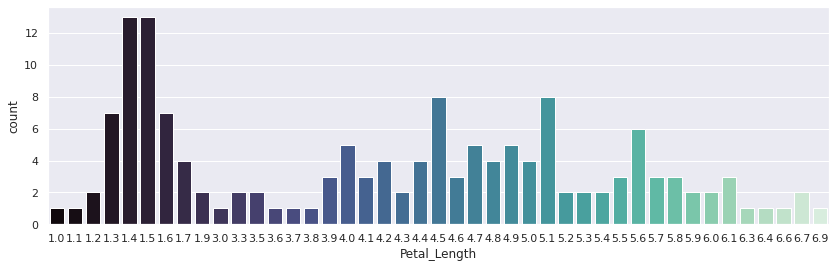

In [11]:
plt.figure(figsize=(14,4))
sns.countplot(x='Petal_Length', data=df, palette='mako')
plt.show()

In [12]:
# Another countplot above gives us an idea of the spread and peaks in petal lengths

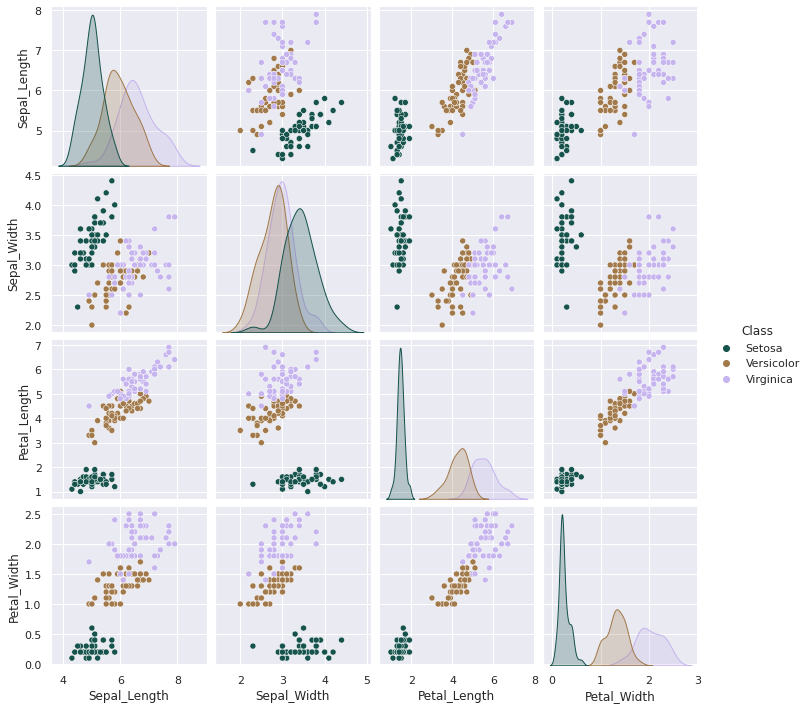

In [13]:
sns.pairplot(df, hue='Class', palette='cubehelix')

In [14]:
"""
The pairplot above is very important because we can see that each Class of plant is easily
distinguished from the others, especially by their Petals, and with only a few small
intersections in their Sepal sizes. So just from this we could infer that the ML models
should have no problem distinguishing and predicting the Class of a given plant from the data.
"""

'\nThe pairplot above is very important because we can see that each Class of plant is easily\ndistinguished from the others, especially by their Petals, and with only a few small\nintersections in their Sepal sizes. So just from this we could infer that the ML models\nshould have no problem distinguishing and predicting the Class of a given plant from the data.\n'

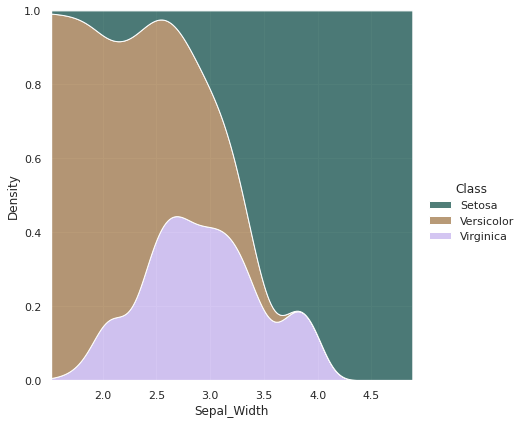

In [15]:
sns.displot(
    data=df,
    x="Sepal_Width", hue="Class",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="cubehelix",
)

In [16]:
# Further focusing on the main intersecting parts of the plants (by their Sepal sizes)
# We can see that each Class or type of plant dominates a certain interval of size
# and although there is some overlap, it is not hard to distinguish the relative max/min.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'loc'
  **contour_kws,


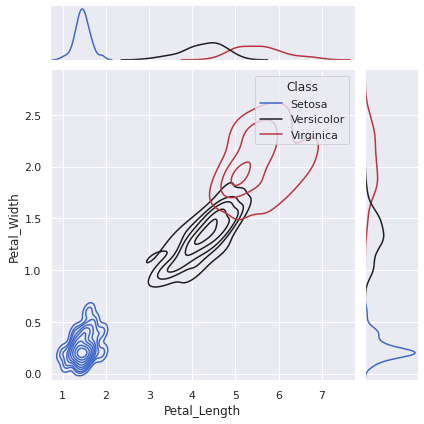

In [17]:
g = sns.jointplot(
    data=df,
    x="Petal_Length", y="Petal_Width", hue="Class", palette='icefire',
    kind="kde",
    legend='Class', loc='upper left'
)

In [18]:
# The elevation style plot above further emphasizes how distinguished the Petals are
# from eachother in each Class of plant, with a small trivial amount of overlap between the
# Versicolor and the Virginica petal sizes.

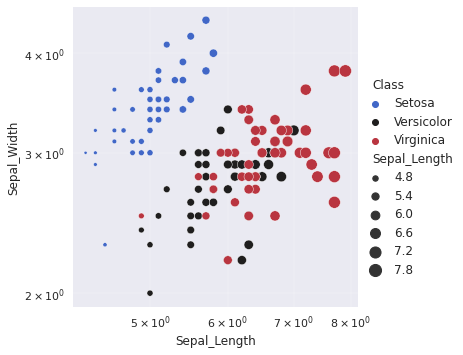

In [19]:
g = sns.relplot(
    data=df,
    x="Sepal_Length", y="Sepal_Width",
    hue="Class", size="Sepal_Length",
    palette='icefire', sizes=(10, 150),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [20]:
# Last graph illustrates the intersection of Sepals very clearly.

In [21]:
"""
Overall, based on all the graphs, even if there are some overlapping data points,
the majority of the data is separate and easily distinguishable from one another.
Therefore it should, theoretically, be pretty straightforward for the Logistic Regression
and KNN models to classify the plants to their respective Class.
"""

'\nOverall, based on all the graphs, even if there are some overlapping data points,\nthe majority of the data is separate and easily distinguishable from one another.\nTherefore it should, theoretically, be pretty straightforward for the Logistic Regression\nand KNN models to classify the plants to their respective Class.\n'

In [22]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [23]:
# change string variables in 'Class' to ints so data can be passed into models
df['Class'] = df['Class'].replace(['Setosa'],'1')
df['Class'] = df['Class'].replace(['Versicolor'],'2')
df['Class'] = df['Class'].replace(['Virginica'],'3')

In [24]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [25]:
from sklearn.preprocessing import StandardScaler

# Logistic Regression model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
sc = StandardScaler()

In [28]:
X = df.iloc[:, [0, 4]].values
y = df.iloc[:, -1].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 1)

Feature Scaling

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_test

array([[ 0.08285332, -1.20127763],
       [-0.80185162,  0.0134975 ],
       [ 1.09394469,  0.0134975 ],
       [-0.42269236, -1.20127763],
       [ 2.73696815,  1.22827264],
       [ 0.71478542,  0.0134975 ],
       [ 1.47310395,  1.22827264],
       [-0.80185162, -1.20127763],
       [-1.30739731, -1.20127763],
       [ 1.47310395,  1.22827264],
       [-0.16991952,  0.0134975 ],
       [-0.42269236, -1.20127763],
       [ 1.72587679,  1.22827264],
       [ 0.84117184,  0.0134975 ],
       [ 0.33562616,  0.0134975 ],
       [-1.68655657, -1.20127763],
       [ 0.08285332,  0.0134975 ],
       [-0.16991952,  0.0134975 ],
       [-0.42269236, -1.20127763],
       [-0.92823805, -1.20127763],
       [-0.29630594,  0.0134975 ],
       [-0.42269236,  0.0134975 ],
       [ 1.22033111,  0.0134975 ],
       [-0.92823805, -1.20127763],
       [ 1.85226321,  1.22827264],
       [-0.0435331 ,  0.0134975 ],
       [-0.29630594, -1.20127763],
       [-0.80185162, -1.20127763],
       [ 0.46201258,

Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
classifier.score(X_test,y_test)

1.0

diff test size and no random state

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

1.0

another diff test size

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

1.0

# Make Predictions using the LR model

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
predictions = classifier.predict(X_test)

Updated Classes:

*   Setosa = 1
*   Versicolor = 2
*   Virginica = 3



In [39]:
print('The Prediciton Accuracy of the model is', classifier.score(X_test,y_test))
pp = classifier.predict(X_test)
plist = pp.tolist()
print("predicted # of Setosa:", plist.count('1'))
print("predicted # of Versicolor:", plist.count('2'))
print("predicted # of Virginica:", plist.count('3'))

The Prediciton Accuracy of the model is 1.0
predicted # of Setosa: 16
predicted # of Versicolor: 19
predicted # of Virginica: 15


In [40]:
print(plist)

['3', '2', '1', '3', '1', '3', '1', '2', '2', '2', '3', '2', '2', '2', '2', '1', '2', '2', '1', '1', '3', '2', '1', '1', '3', '1', '1', '2', '2', '1', '3', '2', '1', '3', '3', '2', '1', '2', '2', '2', '3', '1', '3', '1', '1', '2', '3', '3', '3', '3']


In [41]:
print(pp)

['3' '2' '1' '3' '1' '3' '1' '2' '2' '2' '3' '2' '2' '2' '2' '1' '2' '2'
 '1' '1' '3' '2' '1' '1' '3' '1' '1' '2' '2' '1' '3' '2' '1' '3' '3' '2'
 '1' '2' '2' '2' '3' '1' '3' '1' '1' '2' '3' '3' '3' '3']


# Evaluate the LR model

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 19  0]
 [ 0  0 15]]


# Logistic Regression Conclusion:
The logistic regression model was used to train on the data and classify the test split portion of the data as one of 3 types of plant Classes. Although different parameters of test_size were passed in the train_test_split, the accuracy was still extremely high and overfitted

# Scaling and KNN Analytic model

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(df)

In [49]:
scaled_features = scaler.transform(df)

In [50]:
scaled_features

In [51]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:])
df_feat.head()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Class'], test_size = 0.50)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
pred = knn.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(confusion_matrix(y_test, pred))

[[26  0  0]
 [ 0 26  0]
 [ 0  0 23]]


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [61]:
error_rate = []

#will take some time

for i in range(1,75):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [62]:
error_rate

[0.0,
 0.0,
 0.0,
 0.013333333333333334,
 0.0,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.013333333333333334,
 0.02666666666666667,
 0.02666666666666667,
 0.04,
 0.02666666666666667,
 0.02666666666666667,
 0.02666666666666667,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.05333333333333334,
 0.04,
 0.05333333333333334,
 0.04,
 0.04,
 0.05333333333333334,
 0.04,
 0.04,
 0.04,
 0.04,
 0.05333333333333334,
 0.04,
 0.10666666666666667,
 0.09333333333333334,
 0.12,
 0.10666666666666667,
 0.09333333333333334,
 0.21333333333333335,
 0.21333333333333335,
 0.21333333333333335,
 0.21333333333333335,
 0.21333333333333335,
 0.21333333333333335,
 0.21333333333333335,
 0.22666666666666666,
 0.22666666666666666,
 0.24,
 0.24,
 0.24

Text(0, 0.5, 'Error Rate')

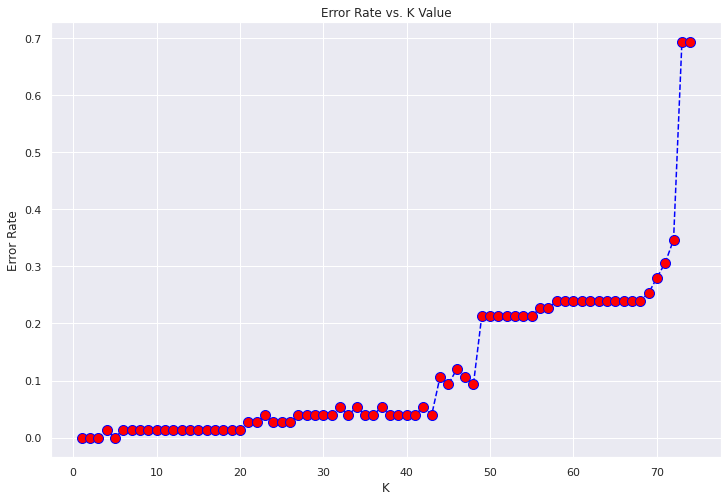

In [63]:
plt.figure(figsize=(12,8))
plt.plot(range(1,75),error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)

In [65]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [66]:
print('With K = 5')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 5
[[26  0  0]
 [ 0 26  0]
 [ 0  0 23]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [73]:
print(confusion_matrix(y_test, pred))

[[26  0  0]
 [ 2  8 16]
 [ 0  0 23]]


In [67]:
knn = KNeighborsClassifier(n_neighbors=38)

In [68]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [69]:
print('With K = 38')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 38
[[26  0  0]
 [ 0 24  2]
 [ 0  1 22]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.96      0.92      0.94        26
           3       0.92      0.96      0.94        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [74]:
print(confusion_matrix(y_test, pred))

[[26  0  0]
 [ 2  8 16]
 [ 0  0 23]]


In [70]:
knn = KNeighborsClassifier(n_neighbors=60)

In [71]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [72]:
print('With K = 60')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 60
[[26  0  0]
 [ 2  8 16]
 [ 0  0 23]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       1.00      0.31      0.47        26
           3       0.59      1.00      0.74        23

    accuracy                           0.76        75
   macro avg       0.84      0.77      0.73        75
weighted avg       0.85      0.76      0.72        75



In [ ]:
print(confusion_matrix(y_test, pred))

# KNN Conlcusion:
The KNN model was used to train on the data, and similarly to the 